# Notebook for Observation
This notebook focuses on the exploration and observation of intraday financial market data for S&P 500 companies during the year 2010. The goal is to analyze the structure, quality, and coverage of the data to ensure it is ready for deeper analysis and modeling tasks. We aim to gain insights into the completeness, granularity, and key characteristics of the dataset.

Let's start by importing the necessary libraries. Key libraries include :
- `IPython.display`: To display dataframes and visualizations seamlessly within the notebook.
- `matplotlib` and `seaborn`: For creating clear and visually appealing plots to analyze and interpret the data.
- `numpy` and `pandas`: For numerical calculations and efficient DataFrame manipulations.
- `os`: For handling file paths and managing datasets within the directory.

In [ ]:
# Import necessary libraries

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os

## 1. Data Preparation

Let's start by creating a single dataframe to unify all our S&P500 intraday stock data.

In [ ]:
# Path to the folder containing the CSV files
folder_path = "S&P500_cleaned"  

# List to store individual DataFrames
dataframes = []

# Iterate through all CSV files in the folder
print("Files found in folder:")
for file in sorted(os.listdir(folder_path)):  # Sort files alphabetically
    if file.endswith("_2010_cleaned.csv"):  # Filter files by format
        print(f"Processing file: {file}")
        ticker = file.split("_")[0]  # Extract the ticker from the filename
        
        # Read the CSV file
        file_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(file_path)
            df.insert(0, 'ticker', ticker)  # Add a 'ticker' column
            dataframes.append(df)  # Add to the main DataFrame list
        except Exception as e:
            print(f"Error reading from {file}: {e}")

# Check if any DataFrames were added
if dataframes:
    # Concatenate all DataFrames
    final_df = pd.concat(dataframes, ignore_index=True)
    output_path = "S&P500_intraday.csv"
    final_df.to_csv(output_path, index=False)
    print(f"\nThe merged CSV file was created successfully: {output_path}")
else:
    print("No valid files were found for merging.")

In [6]:
# Specify the path of the CSV file
file_path = "S&P500_intraday.csv"

# Read CSV file into a DataFrame
df = pd.read_csv(file_path)
display(df)  # Display the DataFrame

,ticker,date,time,bid_price,bid_volume,ask_price,ask_volume,mid_price,order_density,order_imbalance,spread,vw_spread,relative_spread,log_return,volatility
0,AAP,2010-01-04,09:31:00-05:00,40.47,10.0,40.76,1.0,40.615,11.0,0.818182,0.29,3.19,0.007140,NaN,NaN
1,AAP,2010-01-04,09:32:00-05:00,40.78,7.0,40.80,1.0,40.790,8.0,0.750000,0.02,0.16,0.000490,0.004299,NaN
2,AAP,2010-01-04,09:36:00-05:00,40.72,25.0,40.77,4.0,40.745,29.0,0.724138,0.05,1.45,0.001227,-0.001104,0.003821
3,AAP,2010-01-04,09:38:00-05:00,40.78,16.0,40.80,3.0,40.790,19.0,0.684211,0.02,0.38,0.000490,0.001104,0.002717
4,AAP,2010-01-04,09:39:00-05:00,40.78,12.0,40.82,2.0,40.800,14.0,0.714286,0.04,0.56,0.000980,0.000245,0.002296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887965,ZMH,2010-12-31,15:54:00-05:00,53.74,18.0,53.74,29.0,53.740,47.0,-0.234043,0.00,0.00,0.000000,0.000558,0.001000
27887966,ZMH,2010-12-31,15:55:00-05:00,53.74,18.0,53.74,30.0,53.740,48.0,-0.250000,0.00,0.00,0.000000,0.000000,0.001000
27887967,ZMH,2010-12-31,15:56:00-05:00,53.74,30.0,53.74,25.0,53.740,55.0,0.090909,0.00,0.00,0.000000,0.000000,0.001004
27887968,ZMH,2010-12-31,15:57:00-05:00,53.73,24.0,53.73,12.0,53.730,36.0,0.333333,0.00,0.00,0.000000,-0.000186,0.001000


Now we have our temporal observations per intraday stock data gathered into a unique dataframe to facilitate some of our manipulations.

## 2. Initial Overview

In this section, we focus on understanding the scope and structure of the available intraday stock market data. 

We begin by counting the total number of available CSV files corresponding to different S&P500 companies. Each file represents the intraday data of a specific stock.  

In [25]:
# Path to the folder containing cleaned CSV files
data_folder = "S&P500_cleaned"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

# Display the total number of CSV files
num_files = len(csv_files)
print(f"Total number of available S&P500 intraday stock market data files : {num_files}")

Total number of available S&P500 intraday stock market data files : 401


This indicates that intraday data is available for the majority of the S&P500 companies. However, a small number of companies may be missing from the dataset, which should be taken into account during further analyses.

Next, we compute the average number of temporal observations per file, which reflects how frequently the intraday data was recorded during the trading hours of 2010.

In [29]:
# Initialize total row count
total_rows = 0

# Loop through all CSV files to calculate total rows
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path, usecols=['date', 'time'])  # Load minimal columns for efficiency
    total_rows += len(df)

# Compute the average number of rows per file
average_rows = total_rows / num_files
print(f"Average number of temporal observations per intraday stock data file : {average_rows:.2f}")

Average number of temporal observations per intraday stock data file : 69546.06


The high average number of temporal observations per intraday stock data file (69,546.06) indicates that the data is sufficiently granular for intraday analysis, capturing a large number of timestamps for each stock during the year 2010. In an ideal scenario, considering only trading days (excluding weekends) and regular trading hours from 9:30 AM to 4:00 PM (6.5 hours or 390 minutes per day), we would expect approximately 99,450 observations per stock (252 trading days × 390 minutes). The slight shortfall compared to this ideal number may be attributed to market holidays, data gaps, or specific periods of low activity. Nonetheless, the observed coverage remains substantial and ensures that we can capture fine-grained market dynamics across the trading days of the year.

Calculating the average number of temporal observations per day for all stocks in the dataset could provide us with information about the granularity and consistency of intraday data across trading days in 2010.

In [33]:
# Initialize variables for calculations
total_daily_observations = 0
total_days = 0

# Loop through all CSV files
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

for file in csv_files:
    # Load the file
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path, usecols=['date', 'time'])  # Minimal columns for efficiency
    
    # Group by date to count daily observations
    daily_counts = df.groupby('date').size()
    
    # Add to totals
    total_daily_observations += daily_counts.sum()
    total_days += len(daily_counts)

# Calculate the average number of observations per day
average_observations_per_day = total_daily_observations / total_days
print(f"Average number of observations per day : {average_observations_per_day:.2f}")

Average number of observations per day : 283.68


The analysis shows that the average number of temporal observations per day across all tickers in the dataset is 283.68. This indicates a fairly detailed granularity for intraday stock data. However, the value is slightly lower than the total number of trading minutes in a day (390), suggesting the presence of missing data for some timestamps. However, despite the missing data for some timestamps, the dataset still seems sufficient for a robust analysis.

To better visualize the temporal coverage of the dataset, we create a heatmap where:  
- The rows represent tickers (companies of the S&P500).  
- The columns represent trading weeks in 2010.  
- The color intensity reflects the number of temporal observations recorded for each ticker on a specific week.  

This allows us to identify potential data gaps or irregularities in coverage.

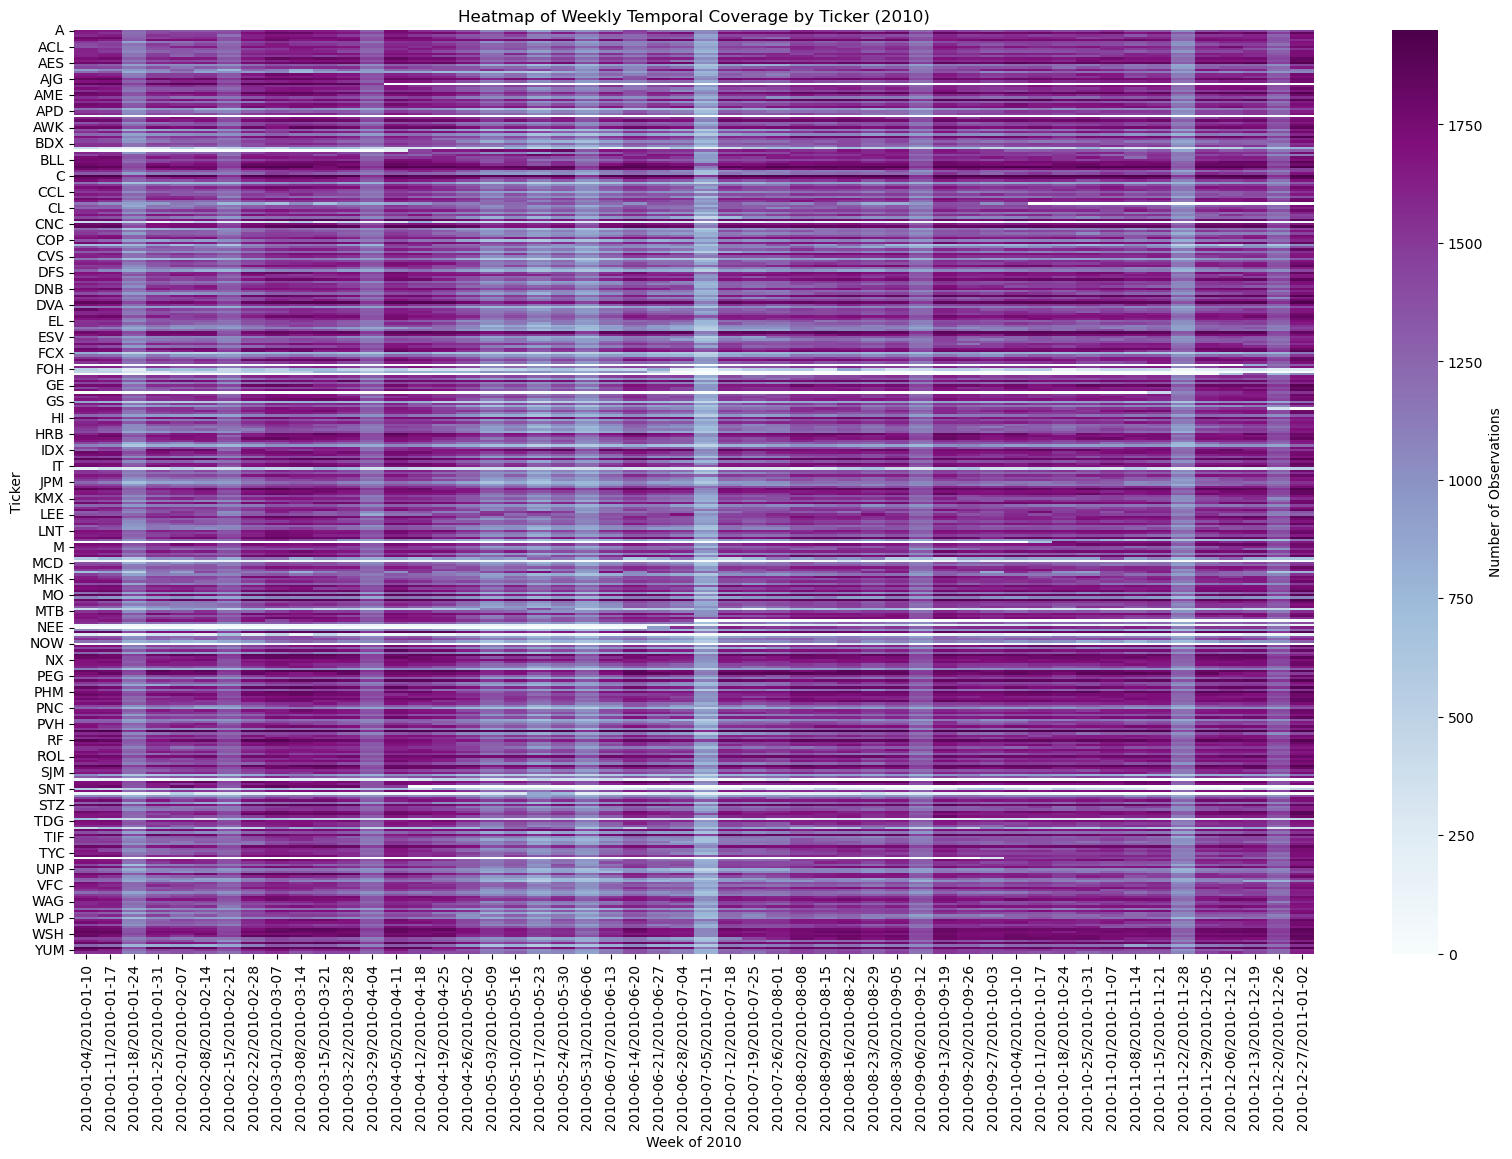

In [37]:
# Initialize an empty list to hold all ticker data
ticker_data_list = []

# List of all CSV files
csv_files = sorted([file for file in os.listdir(data_folder) if file.endswith('.csv')])

# Process each file
for file in csv_files:
    ticker = file.split('_')[0]  # Extract ticker from file name
    file_path = os.path.join(data_folder, file)
    
    # Read only date and time for efficiency
    df = pd.read_csv(file_path, usecols=['date', 'time'])
    df['date'] = pd.to_datetime(df['date'])  # Ensure date is in datetime format
    
    # Count observations grouped by week
    df['week'] = df['date'].dt.to_period('W')  # Group into weekly intervals
    weekly_counts = df.groupby('week').size().rename(ticker)
    
    # Append to the list
    ticker_data_list.append(weekly_counts)

# Concatenate all ticker data into a single DataFrame
coverage_data = pd.concat(ticker_data_list, axis=1).T  # Tickers as rows, weeks as columns
coverage_data = coverage_data.fillna(0).sort_index()  # Fill missing values, sort tickers alphabetically

# Convert weeks back to strings for visualization
coverage_data.columns = coverage_data.columns.astype(str)

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(coverage_data, cmap="BuPu", cbar_kws={'label': 'Number of Observations'})
plt.title("Heatmap of Weekly Temporal Coverage by Ticker (2010)")
plt.xlabel("Week of 2010")
plt.ylabel("Ticker")
plt.show()

The heatmap reveals that most tickers exhibit consistent and high temporal coverage throughout 2010, with darker purple regions indicating continuous and reliable intraday market data. However, during specific weeks, some tickers show gaps (lighter or white areas), likely due to market closures or low trading activity during those periods. Nevertheless, the weekly aggregation of observations confirms that the dataset overall has sufficient coverage for meaningful analysis.

## 3. Global Analysis of Key Features

In this section, we focus on analyzing and visualizing the key financial and market features in the dataset to understand their behavior and distribution.

Let's compute descriptive statistics for critical features in the dataset : `bid_price`, `ask_price`, `mid_price`, `order_density`, `spread`, `relative_spread`, `order_imbalance`, `log_return`, and `volatility`.  These statistics (mean, median, standard deviation, minimum, maximum, and percentiles) provide insights into the overall behavior and distribution of each feature, highlighting central tendencies and potential outliers.  

In [42]:
# Load the full S&P500 intraday dataset
df = pd.read_csv('S&P500_intraday.csv')

# List of key features
key_features = ['bid_price', 'ask_price', 'mid_price', 'order_density', 'order_imbalance', 'spread', 'relative_spread', 'log_return', 'volatility']

# Compute descriptive statistics for key features
descriptive_stats = df[key_features].describe()

# Transpose for better readability
descriptive_stats = descriptive_stats.T

# Display the table
print("Descriptive Statistics for Key Features Across the Entire Dataset :")
display(descriptive_stats)

Descriptive Statistics for Key Features Across the Entire Dataset :


,count,mean,std,min,25%,50%,75%,max
bid_price,27887970.0,44.960639,49.269904,0.000000,22.310000,36.250000,55.100000,766.560000
ask_price,27887970.0,45.217599,469.504029,0.000000,22.320000,36.260000,55.120000,1000000.000000
mid_price,27887970.0,45.089119,238.602542,0.000000,22.315000,36.250000,55.110000,500038.250000
order_density,27887970.0,225.011197,2813.533661,0.000000,10.000000,21.000000,56.000000,566066.000000
order_imbalance,27887840.0,0.337533,0.375481,-1.000000,0.090909,0.384615,0.636364,1.000000
spread,27887970.0,0.256960,466.903011,0.000000,0.010000,0.010000,0.010000,999990.370000
relative_spread,27887649.0,0.000676,0.004272,0.000000,0.000151,0.000304,0.000553,2.000000
log_return,27887163.0,0.000003,0.007092,-10.787321,-0.000172,0.000000,0.000290,10.726298
volatility,27887027.0,0.000793,0.007390,0.000000,0.000304,0.000518,0.000886,5.830378


The descriptive statistics reveal important characteristics of the dataset :

- The `bid_price`, `ask_price`, and `mid_price` exhibit consistent averages around 45, demonstrating a reliable central tendency across all tickers and timestamps. This reflects the stability of price data over the year 2010. But the extreme maximum values suggest the possible presence of outliers  
- The `order_density` shows a healthy level of trading activity with significant variability, which allows us to capture diverse market dynamics.  
- The `order_imbalance` centers around 0.33, suggesting a slight but natural tilt in bid volumes relative to ask volumes while remaining within the expected range of -1 to 1, which is consistent with real-world market behavior.
- The `spread` and `relative_spread` are generally low, indicating high market liquidity and efficient pricing for most stocks.
- `log_return` and `volatility` show results consistent with financial markets, since the former is well centered around 0, while the latter remains low on average, confirming that our dataset includes stable periods as well as brief moments of market fluctuations.

Overall, these results validate the quality of our dataset: it is granular, balanced, and reflective of realistic intraday market behavior. While extreme values and outliers exist in certain features, they are to be expected in financial data and provide opportunities for deeper exploration. This makes our dataset a strong foundation for robust analysis and modeling.  

To better understand the characteristics of our dataset, we analyze the distribution and detect potential outliers for critical features using histograms and boxplots. Histograms will provide an overview of the data distribution, while boxplots offer a concise visualization of data spread and potential outliers beyond the whiskers. These visualizations will help identify skewness, variability, and extreme values across the key features. 

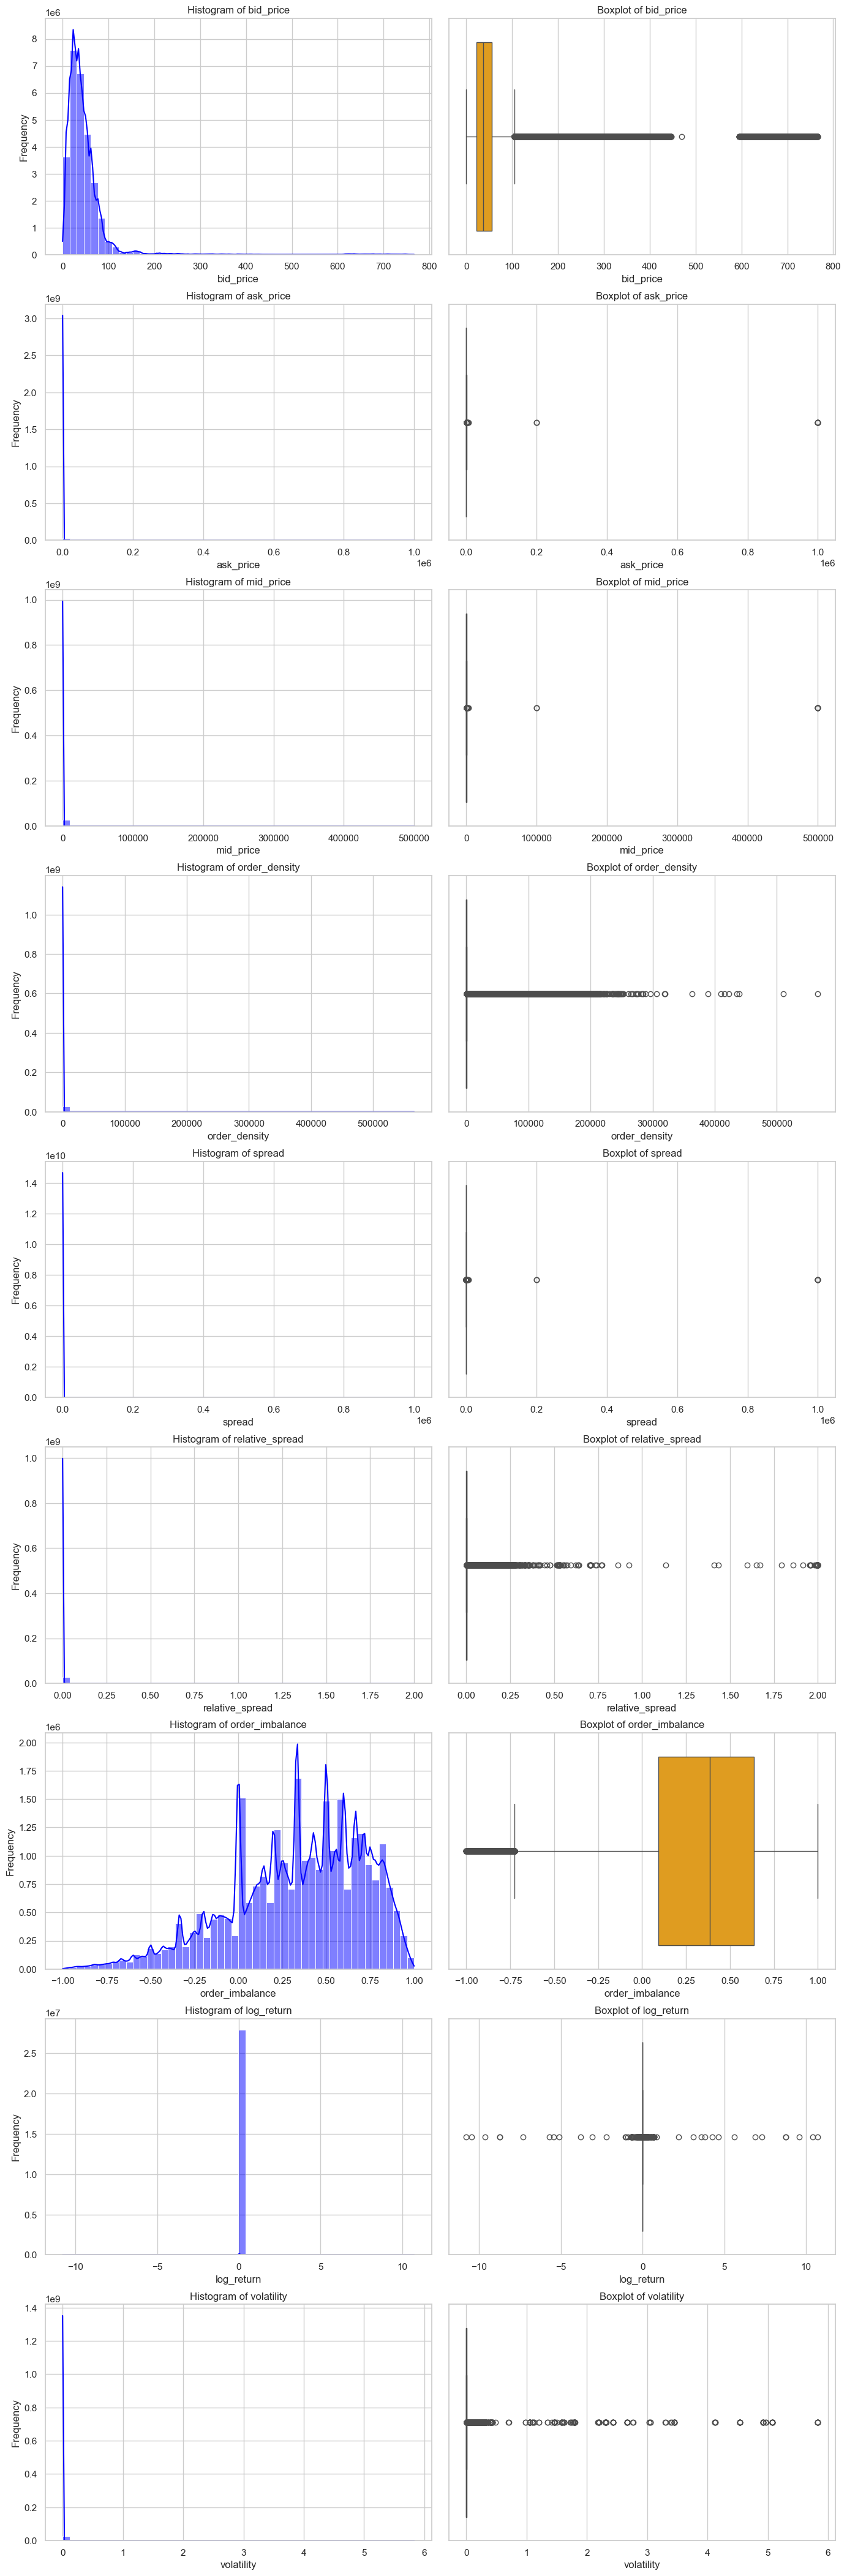

In [46]:
# List of key features to analyze
key_features = ['bid_price', 'ask_price', 'mid_price', 'order_density',
                'spread', 'relative_spread', 'order_imbalance', 'log_return', 'volatility']

# Set the style for the plots
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot histograms and boxplots side by side
num_features = len(key_features)
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(14, 5 * num_features))

for i, feature in enumerate(key_features):
    # Histogram on the left
    sns.histplot(df[feature], bins=50, kde=True, color="blue", ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot on the right
    sns.boxplot(x=df[feature], color="orange", ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust title spacing
plt.show()

The histograms and boxplots of the key features reveal significant insights into the dataset. Several variables, such as bid_price, ask_price, and order_density, display potential outliers, as evident from the heavily right-skewed distributions and the extreme values observed in the boxplots. However, it is essential to interpret these features cautiously, as their values inherently depend on the specific ticker they represent, i.e., the company associated with each dataset. Treating all features uniformly across tickers might lead to misleading conclusions. A more effective approach is to evaluate outliers within the context of each ticker independently, ensuring that the analysis accounts for company-specific characteristics. 

The following code addresses the identification of outliers within the key features bid_price and ask_price. These features are foundational, as other calculated metrics, such as spread, relative_spread, and volatility, derive directly from them. Removing outliers from these primary features ensures consistency and eliminates the propagation of erroneous data into dependent variables. Regarding order_density, outliers are not explicitly identified or removed, as this feature is more indicative of trading activity rather than an intrinsic market property of the stock. The decision aligns with the objective to preserve insights into trading dynamics across different tickers. This method strikes a balance between cleaning the data and retaining its analytical richness.

In [50]:
# Tolerance ratio : 100% of the IQR
TOLERANCE_RATIO = 1 

def process_outliers_with_tolerance(df, features):
    """
    Detects and summarizes outliers in a DataFrame based on specified features, 
    with bounds adjusted by a tolerance ratio.
    
    Parameters:
    - df (DataFrame): The input DataFrame containing the data to analyze. 
                      It must include a 'ticker' column and the specified features.
    - features (list): A list of column names (features) to check for outliers.
    
    Returns:
    - DataFrame: A summary of outliers detected for each feature and ticker, 
                 containing the following columns:
    """
    outliers_summary = []
    tickers = df['ticker'].unique()
    
    for ticker in tickers:
        ticker_data = df[df['ticker'] == ticker]
        
        for feature in features:
            Q1 = ticker_data[feature].quantile(0.25)
            Q3 = ticker_data[feature].quantile(0.75)
            IQR = Q3 - Q1
            
            # Adjusted bounds with tolerance
            lower_bound = Q1 - 1.5 * IQR - TOLERANCE_RATIO * IQR
            upper_bound = Q3 + 1.5 * IQR + TOLERANCE_RATIO * IQR
            
            # Identify outliers
            outliers = ticker_data[(ticker_data[feature] < lower_bound) | (ticker_data[feature] > upper_bound)]
            num_outliers = len(outliers)
            perc_outliers = (num_outliers / len(ticker_data)) * 100
            
            if num_outliers > 0:  # Include only tickers with outliers
                outliers_summary.append({
                    'Ticker': ticker,
                    'Feature': feature,
                    'Outliers Count': num_outliers,
                    'Outliers Percentage (%)': round(perc_outliers, 2),
                    'Normal Value Range': f"[{round(lower_bound, 2)}, {round(upper_bound, 2)}]",
                    'Outliers': ', '.join(map(str, outliers[feature].values[:5])) + ('...' if len(outliers) > 5 else '')
                })
    
    # Return the outliers summary as a dataframe
    return pd.DataFrame(outliers_summary)

# List of features to analyze
key_features = ['bid_price', 'ask_price']

# Process outliers with increased tolerance
outliers_summary = process_outliers_with_tolerance(df, key_features)

# Display the outliers summary table
display(outliers_summary)

,Ticker,Feature,Outliers Count,Outliers Percentage (%),Normal Value Range,Outliers
0,AAP,bid_price,3,0.00,"[0.39, 101.43]","0.0, 0.0, 0.0"
1,AAP,ask_price,3,0.00,"[0.37, 101.48]","0.0, 0.0, 0.0"
2,ACL,bid_price,218,0.28,"[136.22, 182.12]","135.25, 136.0, 135.27, 135.05, 134.81..."
3,ACL,ask_price,214,0.27,"[136.25, 182.16]","135.05, 134.82, 135.1, 135.44, 135.78..."
4,ACN,bid_price,1,0.00,"[28.92, 54.65]",0.01
...,...,...,...,...,...,...
101,WCG,bid_price,3405,4.24,"[21.23, 35.2]","35.21, 35.24, 35.29, 35.43, 35.38..."
102,WCG,ask_price,3412,4.25,"[21.25, 35.22]","35.91, 35.55, 35.23, 35.25, 35.39..."
103,WHR,bid_price,3,0.00,"[50.76, 118.74]","0.0, 0.0, 0.0"
104,WHR,ask_price,3,0.00,"[50.81, 118.73]","0.0, 0.0, 0.0"


So, we applied an Interquartile Range (IQR) based method to detect outliers for the bid price and ask price features, analyzing each ticker independently. 

Principle of the IQR Method :
- The IQR is the difference between the third quartile (Q3) and the first quartile (Q1) : IQR = Q3 - Q1
- Outliers are identified as values lying outside the Normal Value Range, calculated as :  
  Lower Bound = Q1 - 1.5 * IQR - Tolerance Ratio * IQR
  Upper Bound = Q3 + 1.5 * IQR + Tolerance Ratio * IQR
- A tolerance ratio was added to extend the range, with a value of 1, allowing the bounds to include additional variability.

The results showed that this method is too strict and not robust enough :
- It flags all values outside the Normal Value Range as outliers, even if they are very close to the bounds. For example, a value just slightly above or below the range was unnecessarily marked as an outlier.
- However, closer inspection revealed that most of the true outliers are extreme values like 0.0, 0.01, or 1000000., which are unrealistic in a financial market context.

To improve robustness, we will simplify our cleaning process by focusing only on the removal of rows where `bid_price` or `ask_price` take on the values 0.0, 0.01, or 1000000.0. These values are clear outliers, while other variations fall within the natural fluctuations expected in stock market data.

In [53]:
def process_and_summarize_outliers(df, output_csv):
    """
    Detects, summarizes, and removes extreme outliers from a DataFrame 
    based on specific predefined values.

    Parameters:
    - df (DataFrame): The input DataFrame containing the data to analyze. 
                      It must include a 'ticker' column and the 'bid_price' and 'ask_price' features.
    - output_csv (str): The file path where the cleaned DataFrame will be saved as a CSV.

    Returns:
    - DataFrame: The cleaned DataFrame with extreme outliers removed.
    """
    # Define extreme outlier values to check
    extreme_outliers = [0.0, 0.01, 1000000.0]
    summary = []  # List to store the summary table
    total_outliers = 0  # Counter for total outliers

    # Loop through each ticker to identify and summarize outliers
    tickers = df['ticker'].unique()
    for ticker in tickers:
        ticker_data = df[df['ticker'] == ticker]
        
        # Analyze 'bid_price' and 'ask_price' features
        for feature in ['bid_price', 'ask_price']:
            # Filter rows containing the outlier values
            outliers = ticker_data[ticker_data[feature].isin(extreme_outliers)]
            num_outliers = len(outliers)
            total_outliers += num_outliers  # Update total outlier count
            perc_outliers = (num_outliers / len(ticker_data)) * 100
            
            # Add to the summary table only if outliers are found
            if num_outliers > 0:
                summary.append({
                    'Ticker': ticker,
                    'Feature': feature,
                    'Outliers Count': num_outliers,
                    'Outliers Percentage (%)': round(perc_outliers, 2),
                    'Outliers': ', '.join(map(str, outliers[feature].unique()))
                })
    
    # Create a summary table
    outliers_summary = pd.DataFrame(summary)
    
    # Filter the original dataframe to remove rows with extreme outliers
    cleaned_df = df[~((df['bid_price'].isin(extreme_outliers)) | (df['ask_price'].isin(extreme_outliers)))]

    # Save the cleaned dataframe to a CSV file
    cleaned_df.to_csv(output_csv, index=False)

    # Display the summary table and total outlier count
    display(outliers_summary)
    print(f"The total number of outliers found and removed is: {total_outliers}")

    return cleaned_df

# Filepath for the cleaned data
output_csv = 'S&P500_intraday_cleaned.csv'

# Process outliers and display the summary table
cleaned_df = process_and_summarize_outliers(df, output_csv)

,Ticker,Feature,Outliers Count,Outliers Percentage (%),Outliers
0,AAP,bid_price,3,0.0,0.0
1,AAP,ask_price,3,0.0,0.0
2,ACN,bid_price,1,0.0,0.01
3,AIG,bid_price,2,0.0,0.0
4,AIG,ask_price,2,0.0,0.0
...,...,...,...,...,...
56,WAB,bid_price,2,0.0,0.0
57,WAB,ask_price,2,0.0,0.0
58,WHR,bid_price,3,0.0,0.0
59,WHR,ask_price,3,0.0,0.0


The total number of outliers found and removed is: 686


The table above summarizes the identified and removed outliers for the `bid_price` and `ask_price` features across different tickers. Outliers were specifically defined as rows where these features took unrealistic values : 0.0, 0.01, or 1000000.0. A total of 686 outliers were detected and removed from the dataset. These outliers represent anomalous data points that do not align with typical market behavior.

As a result, the dataset has been cleaned by eliminating the rows containing these invalid values. The cleaned dataset has been saved as S&P500_intraday_cleaned.csv. This dataset is now free from extreme outliers, ensuring a more reliable foundation for further analysis. Let's compute descriptive statistics for critical features in this cleaned dataset.

In [57]:
# Load the full S&P500 intraday dataset
cleaned_df = pd.read_csv('S&P500_intraday_cleaned.csv')

# List of key features
key_features = ['bid_price', 'ask_price', 'mid_price', 'order_density', 'order_imbalance', 'spread', 'relative_spread', 'log_return', 'volatility']

# Compute descriptive statistics for key features
descriptive_stats = cleaned_df[key_features].describe()

# Transpose for better readability
descriptive_stats = descriptive_stats.T

# Display the table
print("Descriptive Statistics for Key Features Across the Entire Cleaned Dataset :")
display(descriptive_stats)

Descriptive Statistics for Key Features Across the Entire Cleaned Dataset :


,count,mean,std,min,25%,50%,75%,max
bid_price,27887605.0,44.961219,49.269960,0.013500,22.310000,36.250000,55.100000,766.560000
ask_price,27887605.0,45.002883,72.847415,0.078000,22.320000,36.260000,55.120000,199999.984400
mid_price,27887605.0,44.982051,56.124310,0.045750,22.315000,36.250000,55.110000,100046.002200
order_density,27887605.0,225.013417,2813.551553,2.000000,10.000000,21.000000,56.000000,566066.000000
order_imbalance,27887605.0,0.337535,0.375478,-0.999801,0.090909,0.384615,0.636364,0.999978
spread,27887605.0,0.041664,53.561155,0.000000,0.010000,0.010000,0.010000,199933.984400
relative_spread,27887605.0,0.000672,0.003458,0.000000,0.000151,0.000304,0.000553,1.998680
log_return,27887124.0,0.000001,0.005706,-10.787321,-0.000172,0.000000,0.000290,7.285619
volatility,27886793.0,0.000792,0.007167,0.000000,0.000304,0.000518,0.000886,5.830378


Certainly not a big change given that the initial data that we had was already rather clean, but this cleaning step nevertheless allowed us to refine our dataset.

## 4. Demonstrating Data Richness

In this section, we focus on highlighting the diversity of our dataset. By showing that each ticker has unique characteristics and behaviors, we aim to demonstrate that our dataset is sufficiently comprehensive and rich to serve as a solid basis for advanced modeling tasks

We want to highlight the richness of our dataset by analyzing the key features bid price, bid volume, ask price, ask volume, mid price, and order density for each ticker to demonstrate how diverse market states can be across different tickers. To achieve this, we calculate the average value of each feature for every ticker, group these values into dynamic bins capped at 100+ for clarity, and create bar plots to visualize the distribution of tickers across these bins. The resulting visualizations will help us observe the variability and diversity of each feature across all tickers, providing insights into the complexity and richness of our cleaned data.

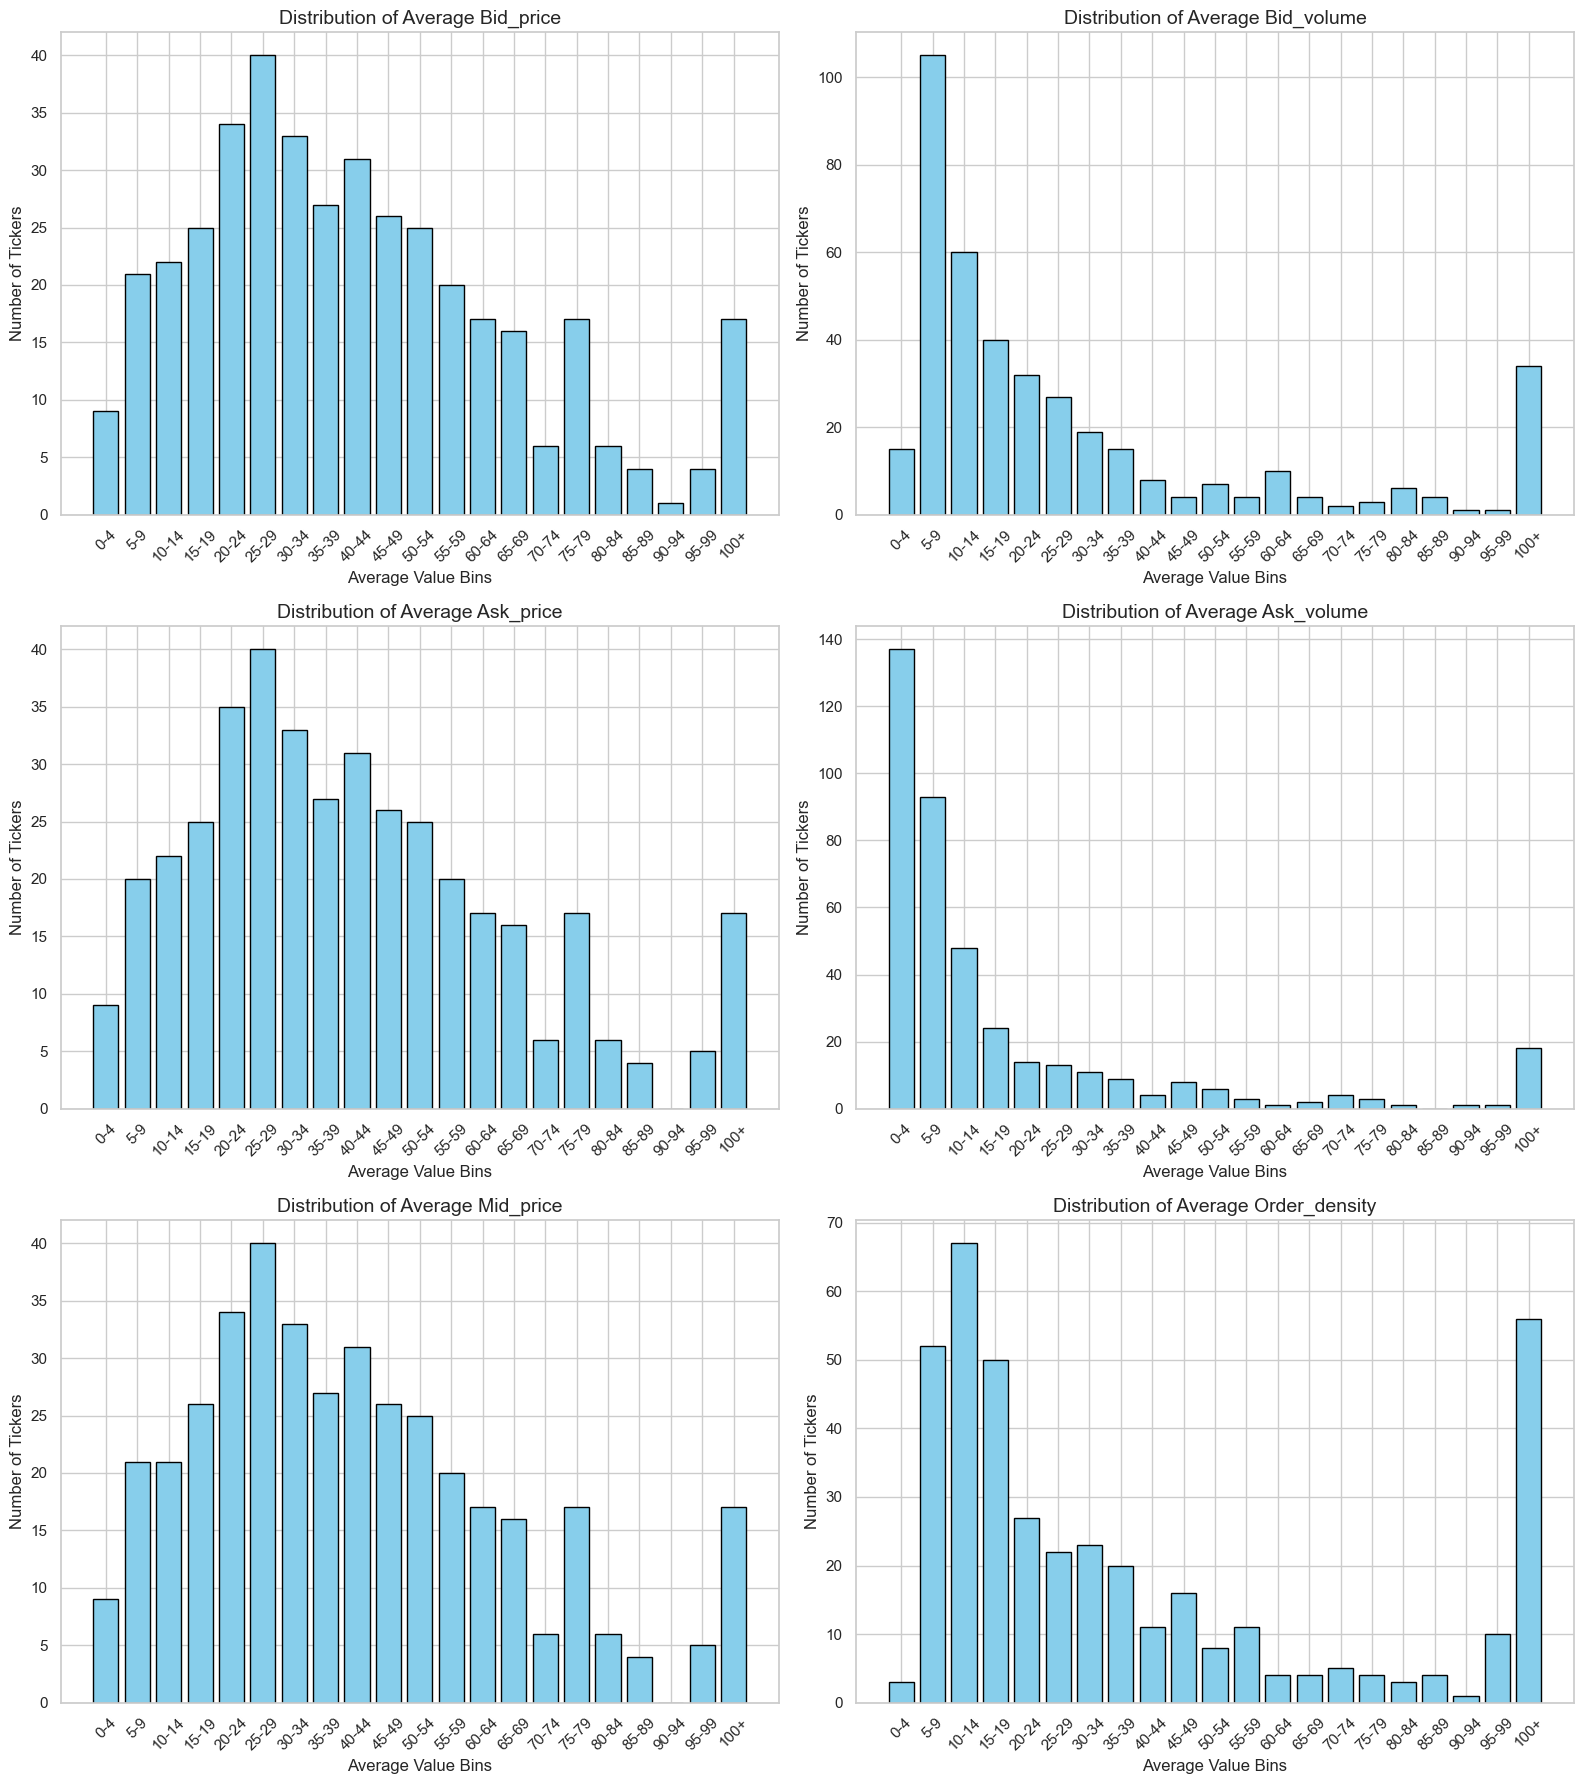

In [62]:
# Load the cleaned dataset
data = pd.read_csv('S&P500_intraday_cleaned.csv')

# Features to analyze
features = ['bid_price', 'bid_volume', 'ask_price', 'ask_volume', 'mid_price', 'order_density']

# Initialize subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns
axes = axes.flatten()

# Process each feature
for i, feature in enumerate(features):
    # Calculate the mean value of the feature for each ticker
    feature_means = data.groupby('ticker')[feature].mean()
    
    # Bins: Group values dynamically, cap bins to 100+
    bins = list(range(0, 101, 5))  # Bins from 0 to 100 with step 5
    bins.append(float('inf'))  # Group all values >100 into the last bin
    
    # Create bin labels
    labels = [f"{bins[j]}-{bins[j+1]-1}" for j in range(len(bins)-2)] + ["100+"]
    
    # Bin the values
    binned_data = pd.cut(feature_means, bins=bins, labels=labels, include_lowest=True)
    bin_counts = binned_data.value_counts().sort_index()
    
    # Plot the bar chart
    axes[i].bar(bin_counts.index, bin_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Average {feature.capitalize()}', fontsize=14)
    axes[i].set_xlabel('Average Value Bins', fontsize=12)
    axes[i].set_ylabel('Number of Tickers', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Adjust layout
plt.tight_layout()
plt.show()

The bar plots for these features clearly demonstrate the diversity of tickers and their respective feature values :
- Bid and Ask Prices : Their distributions are centered in specific value ranges (e.g., 20-60). This indicates that most tickers have prices in these ranges, but there are some exceptions extending beyond 100. Such a spread across bins highlights the heterogeneity in stock prices, reflecting different market valuations for each ticker.
- Bid and Ask Volumes : Their distributions show a significant concentration in lower ranges (e.g., 0-10), with a tail extending to higher bins. This suggests that while many tickers have low trading volumes, a subset experiences significantly higher activity, emphasizing market diversity.
- Mid Price and Order Density : Their distributions reflect those of bid and ask prices and volumes, as expected, since they are calculated on this basis.